In [1]:
import pandas as pd
data=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [2]:
data.shape

(908, 13)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [6]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
z=data.corr(numeric_only=True)

In [8]:
z


,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


In [9]:
n=data.select_dtypes(include='number').columns
print(n)

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')


In [10]:
# detecting the outliers
# 1st quantile
q1=data[n].quantile(0.25)
q1

age          47.75
trestbps    120.00
chol        176.75
thalch      118.00
oldpeak       0.00
num           0.00
Name: 0.25, dtype: float64

In [11]:
# 3rd quantile
q3=data[n].quantile(0.75)
q3

age          60.0
trestbps    144.0
chol        270.0
thalch      156.0
oldpeak       1.5
num           2.0
Name: 0.75, dtype: float64

In [12]:
# Inter Quantile Range
iqr=q3-q1
iqr

age         12.25
trestbps    24.00
chol        93.25
thalch      38.00
oldpeak      1.50
num          2.00
dtype: float64

In [13]:
outliers = (data[n] < (q1 - 1.5 * iqr)) | (data[n] > (q3 + 1.5 * iqr))
outliers

,age,trestbps,chol,thalch,oldpeak,num
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
903,False,False,True,False,False,False
904,False,False,False,False,False,False
905,False,False,True,False,False,False
906,False,False,False,False,False,False


In [14]:
# CHECK INCONSISTENCIES

# Example rule: Age should be between 0 and 120
if 'age' in data.columns:
    invalid_age = data[(data['age'] < 0) | (data['age'] > 120)]
    print(f"Invalid 'age' values: {len(invalid_age)}")

Invalid 'age' values: 0


In [15]:
# Example rule: Blood pressure shouldn't be negative
if 'trestbps' in data.columns:
    invalid_bp = data[data['trestbps'] <= 0]
    print(f"Invalid 'trestbps' values: {len(invalid_bp)}")

Invalid 'trestbps' values: 1


In [16]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 1


<Axes: >

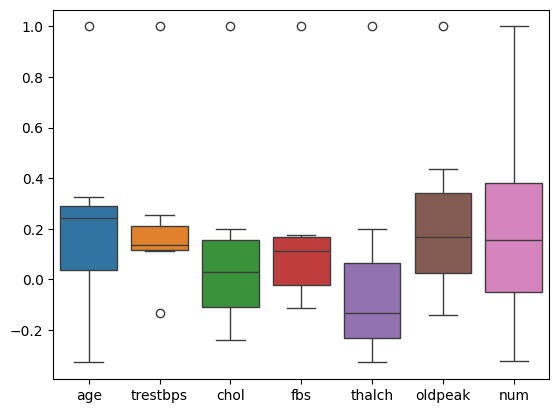

In [17]:
# Boxplot
import seaborn as sns
sns.boxplot(z)

<Axes: >

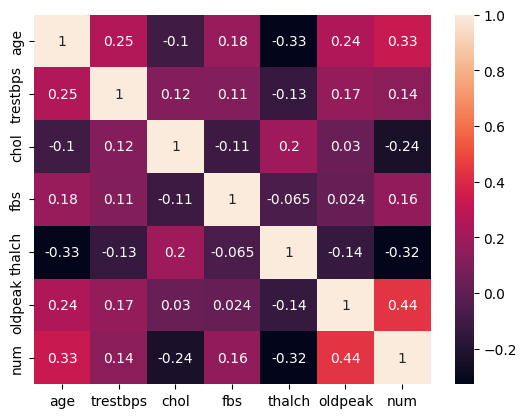

In [18]:
#Correlation matrix
sns.heatmap(z,annot=True)

<Axes: ylabel='Count'>

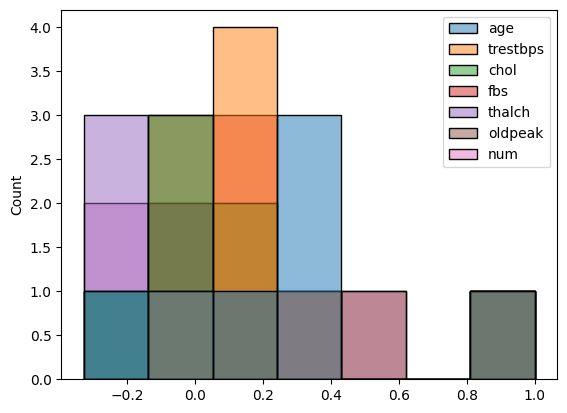

In [19]:
# Histogram
sns.histplot(z)

In [20]:
# Feature Engineering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# Handle boolean column
data['fbs'] = data['fbs'].astype(int)

# Encode categorical columns using One-Hot Encoding
categorical_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Scale numerical features
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [22]:
# View processed data
print("Encoded and scaled dataset shape:", data_encoded.shape)
data_encoded

Encoded and scaled dataset shape: (908, 20)


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1,0.524183,1.288612,0,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,0,-0.147705,-0.815249,0,True,True,False,False,True,False,False,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,0,0.449529,-0.449360,0,True,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,0,2.017268,-0.815249,0,True,False,False,True,False,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,0,-0.371668,0.556834,0,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,0,-0.595631,0.556834,4,True,False,False,False,True,False,False,False,False,False,True,False,True
904,0.896773,1.597292,-0.281021,0,-0.595631,1.928917,4,True,False,False,False,False,True,True,False,False,True,False,False,True
905,0.241249,1.793463,-1.798388,0,-0.483649,1.471556,4,True,False,True,False,False,False,True,False,False,False,False,True,False
906,0.241249,0.518352,0.058155,1,-1.155538,NaN,4,True,False,True,False,False,True,False,False,True,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

x=data_encoded.drop("num", axis=1)  # Replace 'target' with your actual target column
x

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,exang_True,exang_FALSE,exang_TURE,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1.006027,0.567394,0.281297,1,0.524183,1.288612,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.397560,0.076967,0.013526,0,-0.147705,-0.815249,True,True,False,False,True,False,False,False,False,True,False,False,False
2,0.350503,0.322181,-0.084656,0,0.449529,-0.449360,True,False,False,False,True,False,False,False,False,True,False,False,False
3,-0.195767,-0.756760,-0.138211,0,2.017268,-0.815249,True,False,False,True,False,False,False,False,False,True,False,False,False
4,0.350503,-1.149102,-0.004325,0,-0.371668,0.556834,True,False,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.086513,-0.413461,-1.798388,0,-0.595631,0.556834,True,False,False,False,True,False,False,False,False,False,True,False,True
904,0.896773,1.597292,-0.281021,0,-0.595631,1.928917,True,False,False,False,False,True,True,False,False,True,False,False,True
905,0.241249,1.793463,-1.798388,0,-0.483649,1.471556,True,False,True,False,False,False,True,False,False,False,False,True,False
906,0.241249,0.518352,0.058155,1,-1.155538,NaN,True,False,True,False,False,True,False,False,True,False,False,False,False


In [24]:
y=data_encoded["num"]
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [25]:
y = y.apply(lambda x: 1 if x > 0 else 0)
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: num, Length: 908, dtype: int64

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((726, 19), (182, 19), (726,), (182,))

In [27]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1], dtype=int64)

In [29]:
y_prob=model.predict_proba(x_test)[:, 1]  # for ROC-AUC (only for binary classification)
y_prob

array([1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.])

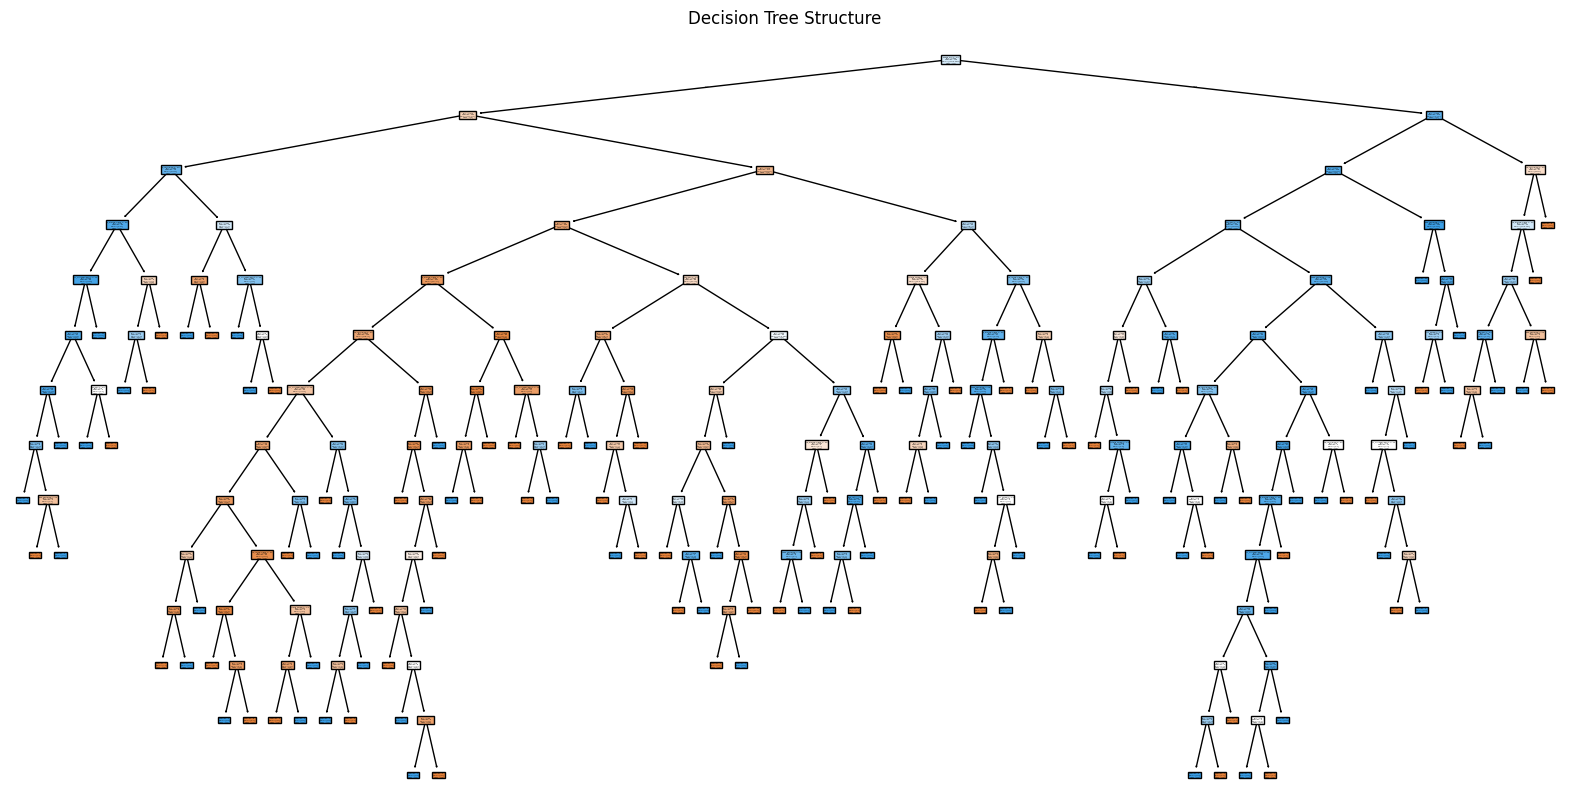

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(model,filled=True,feature_names=x.columns,class_names=True)
plt.title("Decision Tree Structure")
plt.show()

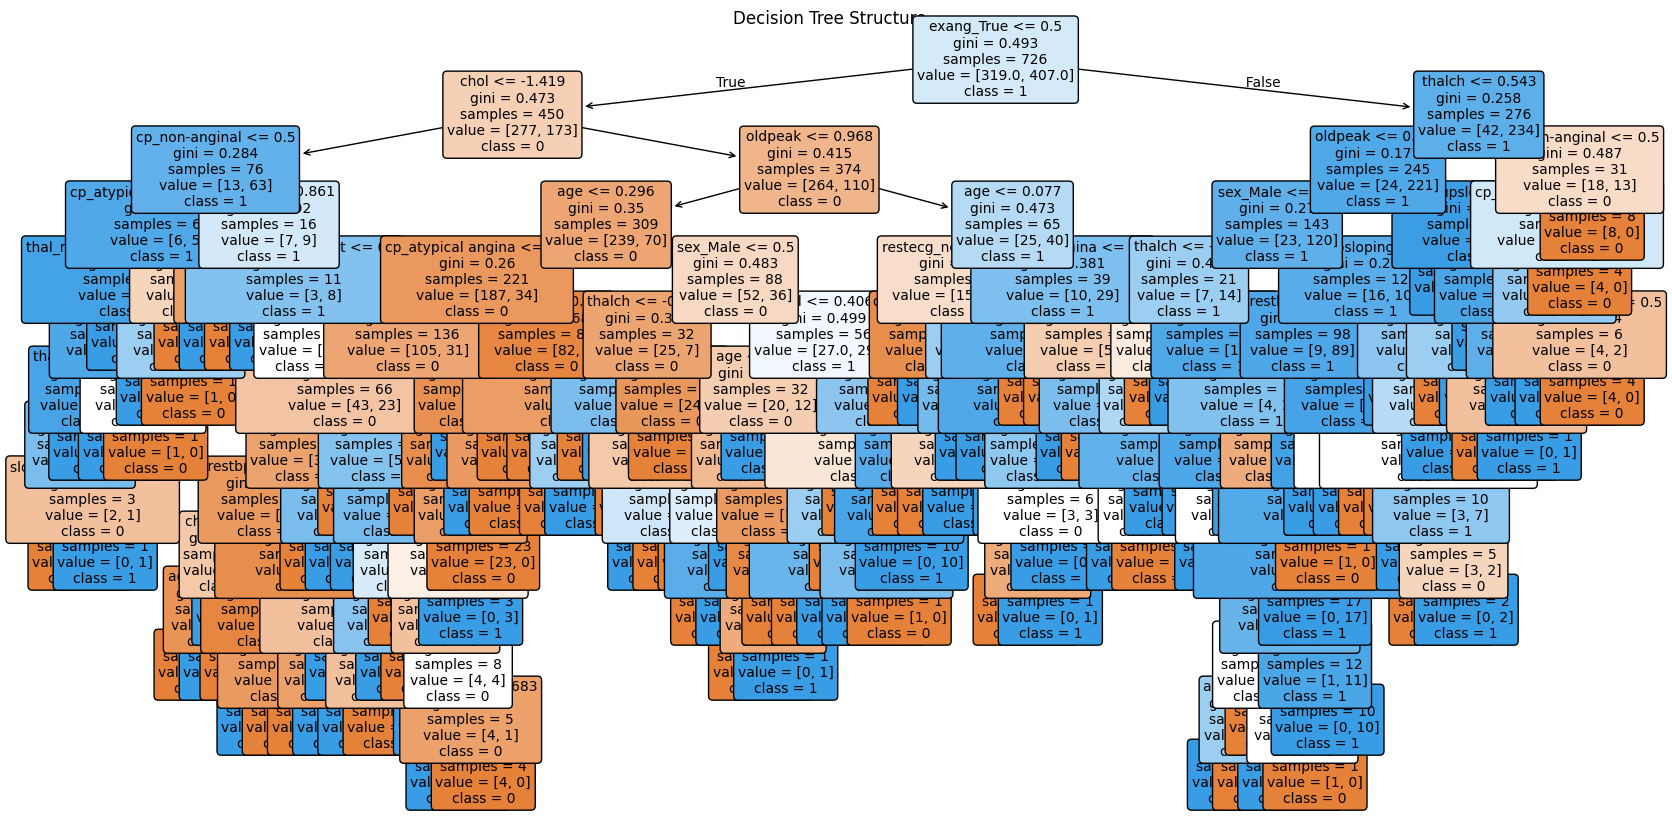

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=x.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

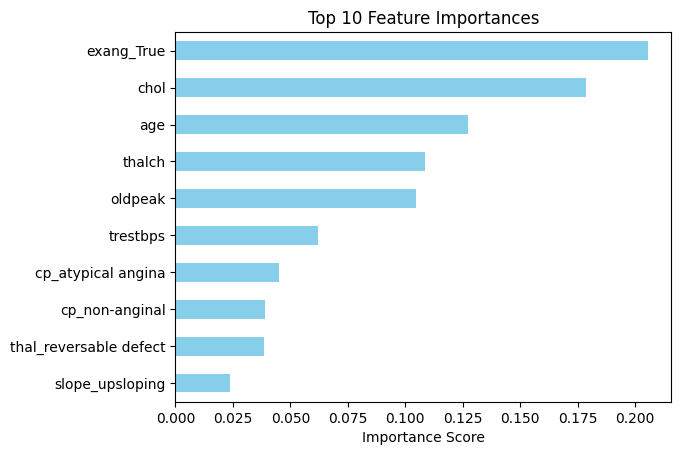

In [32]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(10).plot(kind='barh',color='skyblue')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()

In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))  # use 'macro' or 'weighted' for multi-class
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print("F1 Score:", f1_score(y_test, y_pred, average='binary'))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.7527472527472527
Precision: 0.7821782178217822
Recall: 0.7745098039215687
F1 Score: 0.7783251231527094
ROC AUC Score: 0.7497549019607843


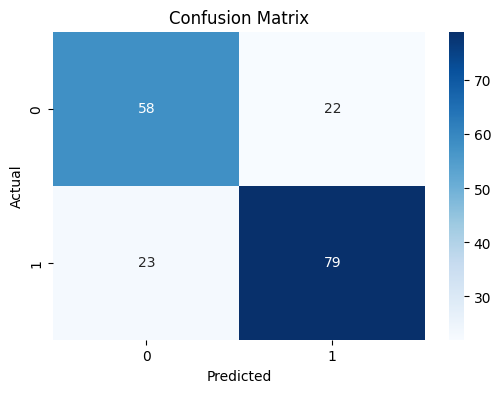

In [34]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
param_grid

{'max_depth': [3, 5, 10, 15, None],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [36]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,scoring='f1_macro',cv=5,n_jobs=-1,verbose=1)
grid_search

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [37]:
# Fit the grid search on training data
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [38]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5}
Best Cross-Validation F1 Score: 0.7556671242827294


In [39]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

,criterion,'entropy'
,splitter,'best'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
# Predict and evaluate
y_pred_best = best_model.predict(x_test)
y_pred_best

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1], dtype=int64)

In [41]:
print("Optimized Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='macro'))

Optimized Model Performance:
Accuracy: 0.7637362637362637
Precision: 0.7611838006230529
Recall: 0.7568627450980392
F1 Score: 0.758419509183516


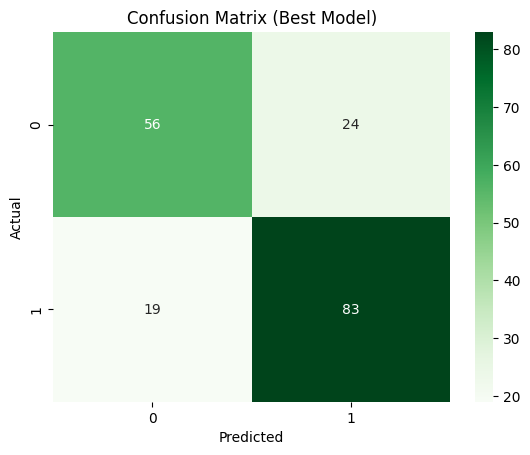

In [42]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        80
           1       0.78      0.81      0.79       102

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



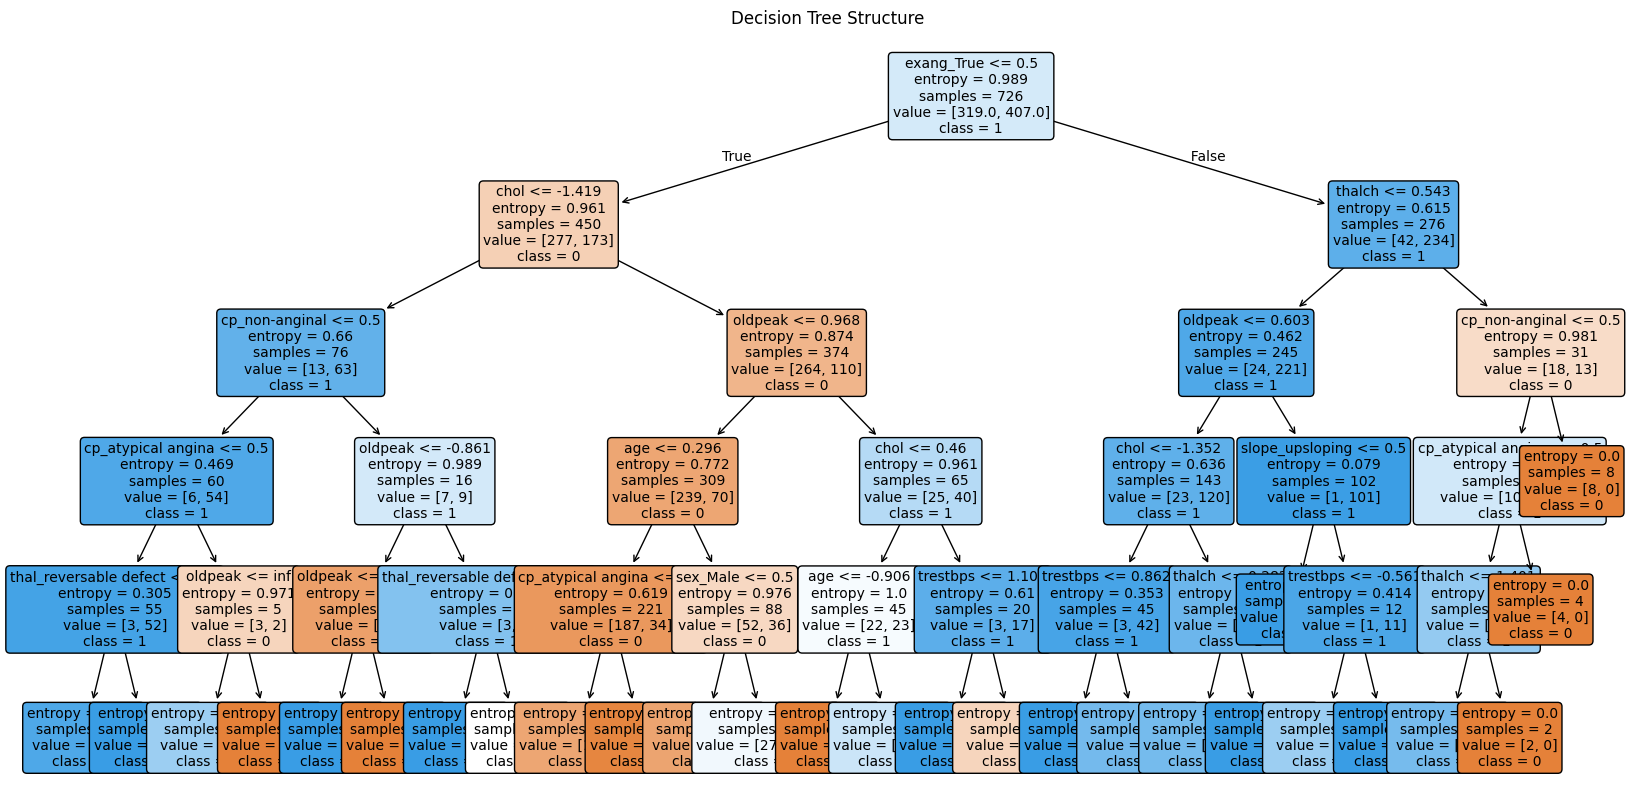

In [44]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=x.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

In [45]:
# Model Evaluation and Analysis:
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        80
           1       0.78      0.81      0.79       102

    accuracy                           0.76       182
   macro avg       0.76      0.76      0.76       182
weighted avg       0.76      0.76      0.76       182



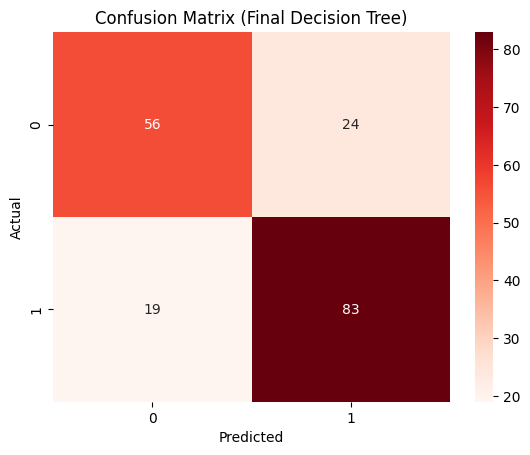

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix (Final Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

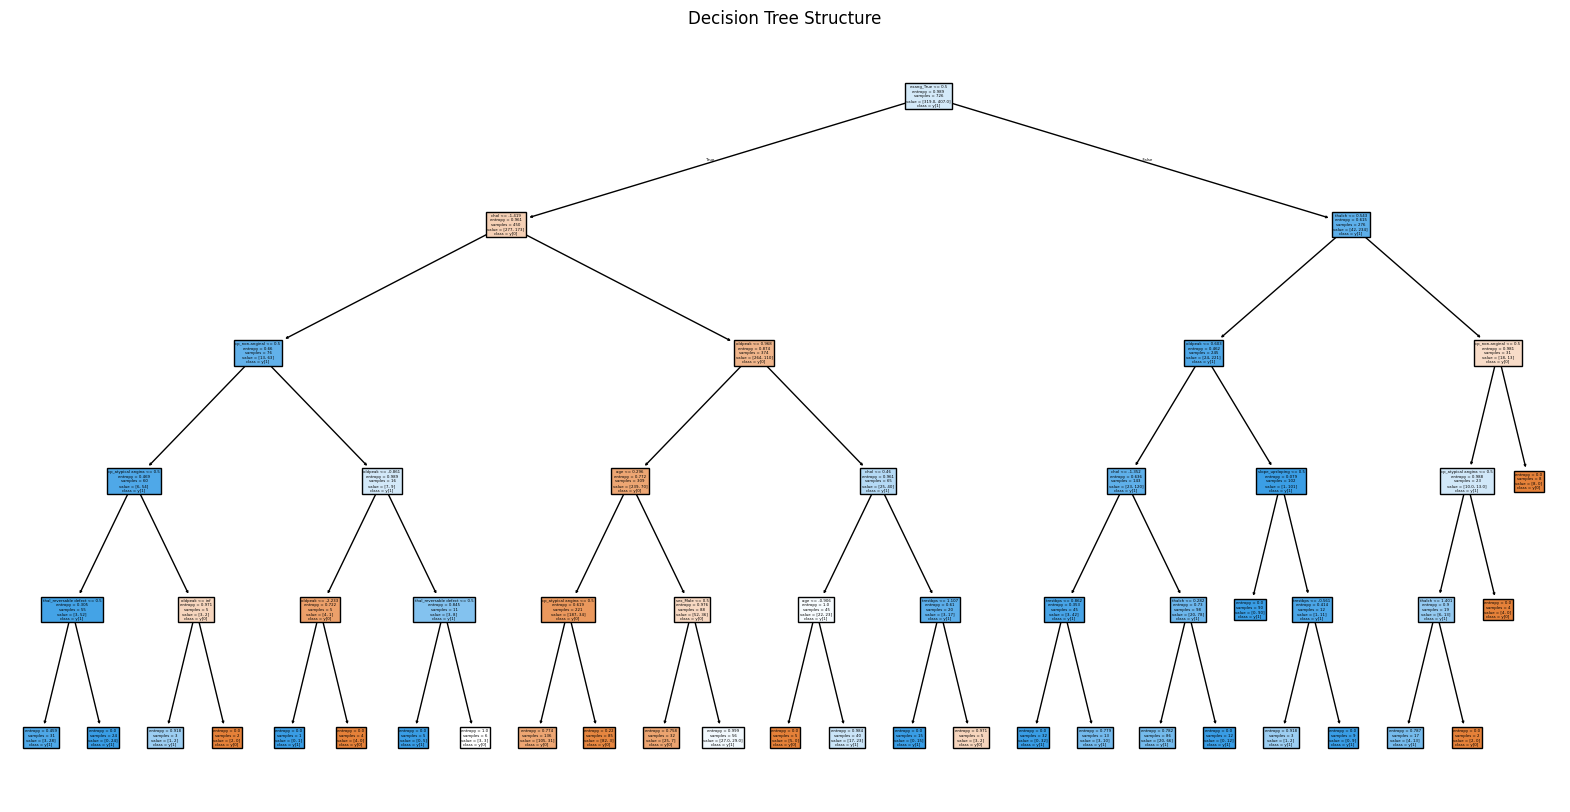

In [47]:
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=x.columns, class_names=True)
plt.title("Decision Tree Structure")
plt.show()

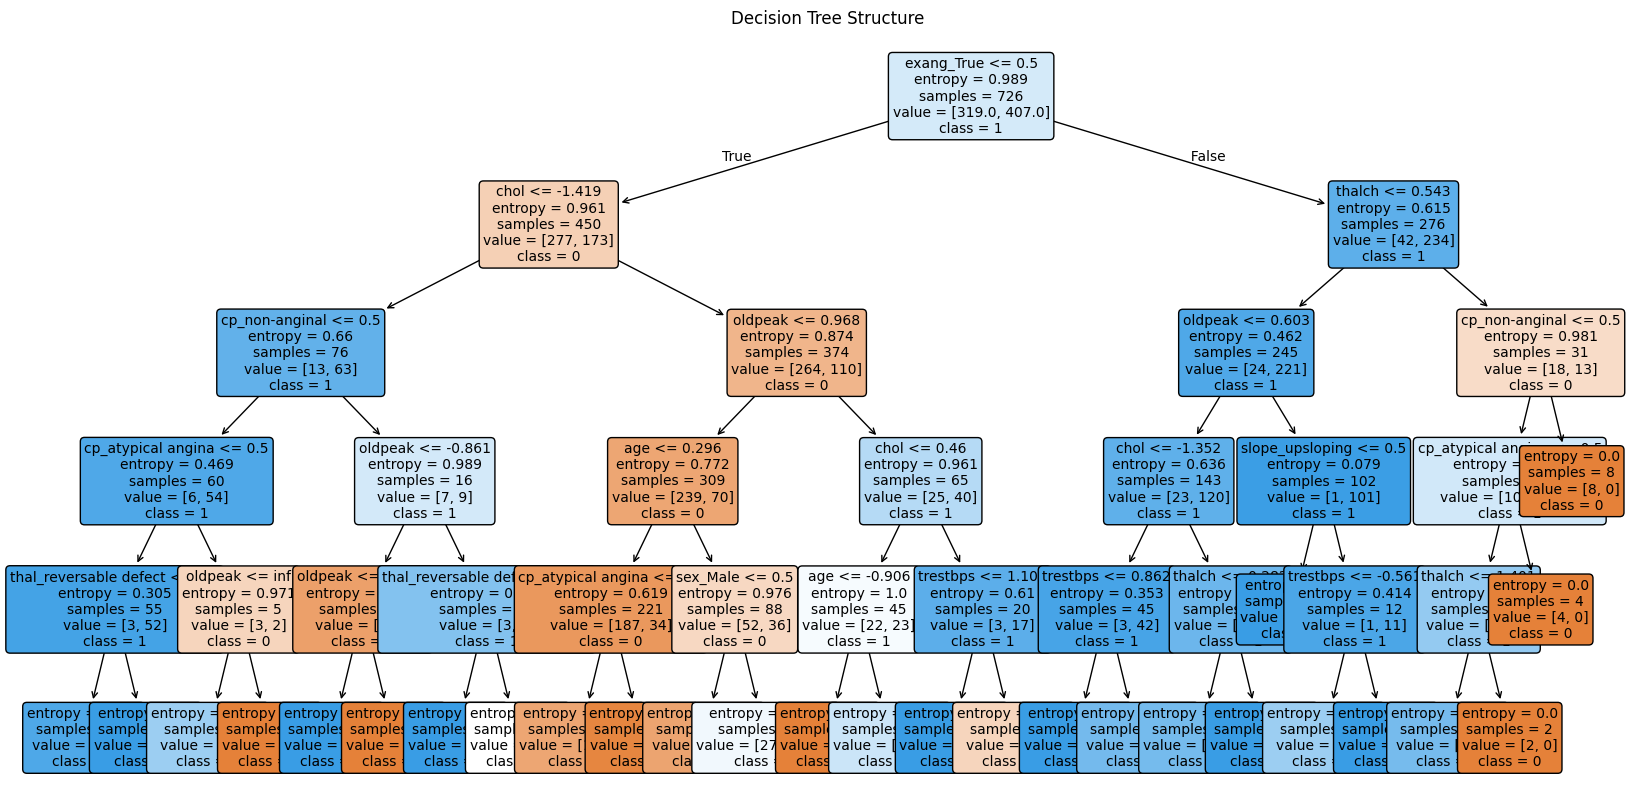

In [48]:
plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=x.columns,
          class_names=[str(cls) for cls in sorted(y.unique())],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

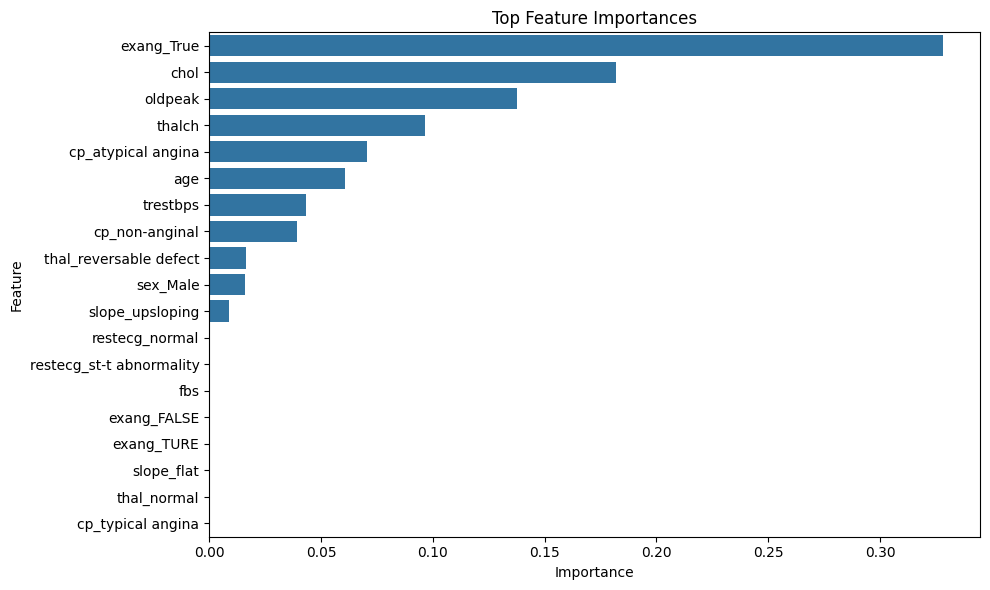

In [49]:
importances = best_model.feature_importances_
features = x.columns
feature_importance_data=pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_data=feature_importance_data.sort_values(by='Importance', ascending=False)
# Plot important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_data)
plt.title("Top Feature Importances")
plt.tight_layout()
plt.show()

Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

 1. max_depth:Limits the maximum depth of the tree.
 2. min_samples_split:Minimum number of samples required to split an internal node.
 3. min_samples_leaf:Minimum number of samples required at a leaf node.
 4. max_leaf_nodes: Limits the number of leaf nodes in the tree.
 5. max_features:Number of features to consider when looking for the best split.
 6. criterion:Function to measure the quality of a split.
 7. splitter:Strategy to choose the split at each node

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding is a technique used to convert categorical variables into numerical values by assigning each unique category a distinct integer value.
* work:
* Each category is replaced with a unique number.

* Example: {Red: 0, Green: 1, Blue: 2}
* It introduces an implied order even if the data is nominal (unordered), which may mislead machine learning algorithms (especially linear models).

One-Hot Encoding is a technique that converts categorical variables into a form that can be provided to machine learning algorithms by creating a new binary column for each category.
* Work:
* Each category gets its own column.
* The presence of a category is marked with a 1, all other columns get 0.
* It increases the dimensionality of the dataset, especially when the categorical variable has many unique values.

Conclusion

The Decision Tree model was successfully applied to the dataset. After cleaning and preparing the data, the model was trained and tested. It gave good accuracy, and hyperparameter tuning improved the performance further. The model is easy to understand, and important features were identified. Overall, it is a useful method for classification problems.